In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import truncnorm


def truncated_normal_val(mean=0, sd=1, low=0, upp=10, type=int):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal_val(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)


def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal_val(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)


number_of_items_per_class = [450, 500]
elevators = {}
# Healthy Elevator

number_of_items = number_of_items_per_class[0]
temperature = truncated_normal_floats(
    mean=57.5, sd=10, low=25, upp=80, num=number_of_items)\

speed = truncated_normal_ints(mean=1, sd=1, low=0, upp=3, num=number_of_items)
voltage = truncated_normal_ints(
    mean=230, sd=15, low=100, upp=260, num=number_of_items)
emergency = np.ones(number_of_items)
data = np.column_stack((temperature, speed, voltage,emergency))
elevators["Healthy"] = data
# Unhealthy Elevator
number_of_items = number_of_items_per_class[1]

temperature = truncated_normal_floats(
    mean=88, sd=13, low=82, upp=90, num=number_of_items)
speed = truncated_normal_ints(mean=1, sd=1, low=0, upp=3, num=number_of_items)
voltage = truncated_normal_ints(
    mean=130, sd=15, low=100, upp=260, num=number_of_items)
emergency = np.zeros(number_of_items)
data = np.column_stack((temperature, speed, voltage,emergency))

elevators["Unhealthy"] = data

data = np.concatenate((elevators["Healthy"], elevators["Unhealthy"]), axis=0)

# Assign the labels

target = np.zeros(sum(number_of_items_per_class))
previous_end = 0
for i in range(1, 2):
    num = number_of_items_per_class[i - 1]
    beg = previous_end
    target[beg:beg+num] += i
    previous_end = beg+num
conc_data = np.concatenate((data, target.reshape(target.shape[0], 1)), axis=1)
np.savetxt("data/elevator_data.txt", conc_data, fmt="%2.2f")


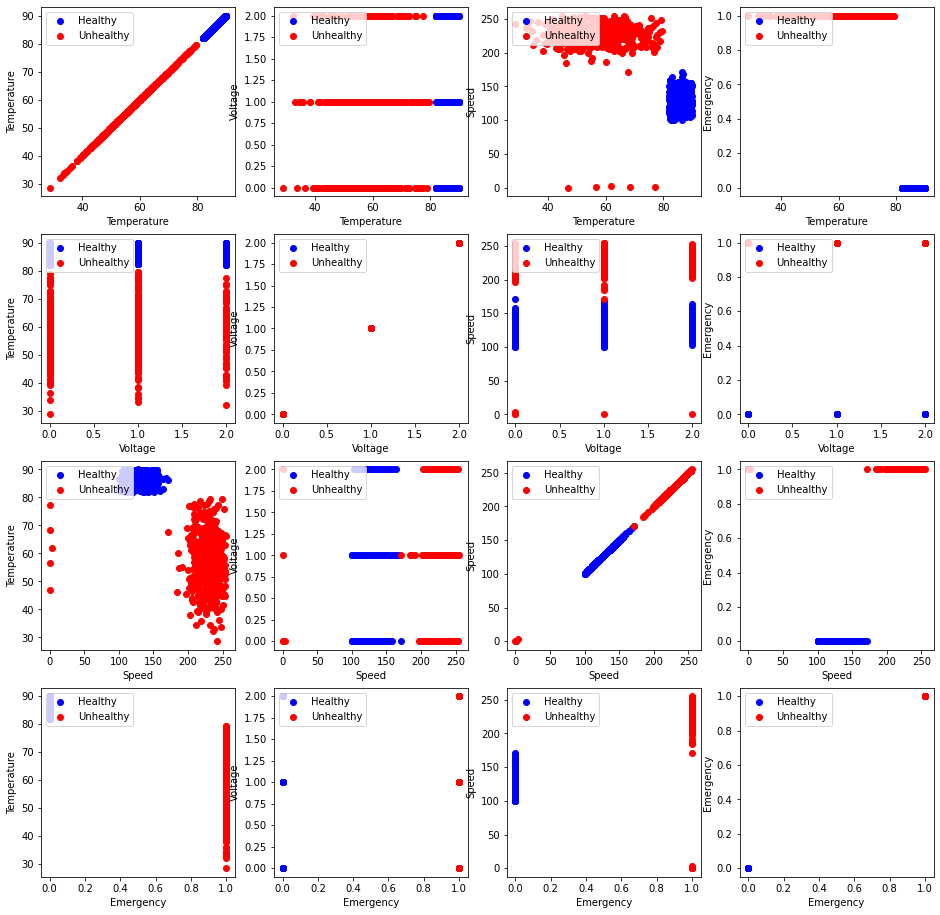

In [21]:
target_names = list(elevators.keys())
feature_names = ['Temperature','Voltage','Speed','Emergency']
n=4
fig,ax = plt.subplots(n,n,figsize = (16,16))
colors = ['blue', 'red']
for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target==color_ind, x], 
                             data[target==color_ind, y],
                             label=target_names[color_ind],
                             c=colors[color_ind])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')

In [3]:
print(list(elevators.keys()))

['Healthy', 'Unhealthy']
